<b><h3>Dimensionality Reduction: Squashing the Data Pancake with PCA</h3></b>

With automatic data collection and feature generation techniques, one can quickly obtain a large number of features. But not all of them are useful. Frequency-based filtering and feature scaling are ways of pruning away uninformative features. Feature dimensionality reduction can also be done using principal component analysis (PCA), which marks an entry to model-based feature engineering techniques. Prior, to this point, most of the techniques can be defined without referencing the data. 

Model-based techniques require information from the data. PCA is defined around the principal axes of the data.

<b><h3>Intuition</h3></b>

Dimensionality reduction is about getting rid of 'uninformative information' while retaining the crucial bits. There are many ways to define 'uninformative'. PCA focuses on the notion of linear dependency. The column space of a data matrix is the span of all the feature vectors. If the column space is small compared to the total number of features, then most of the features are linear combinations of a few key features. Linearly dependent features are a waste of space and computation power because the information could have been encoded in much fewer features. To avoid this situation, principal component analysis tries to reduce the dimensionality by squashing the data into a much lower-dimensional linear subspace.

The key idea here is to replace redundant features with a few new features that adequately summarize information contained in the original feature space. We need a way to mathematically describe the new features we are looking for. Then we can use optimization techniques to find them.

One way to mathematically define 'adequately summarize information' is to say that the new data should retain as much of the original volume as possible. This means we need a way to measure volume. Volume has to do with distance. One could measure the maximum distance between any two pairs of points, but that turns out to be very difficult to optimize.An alternative is to measure the average distance between pairs of points, or equivalently the average distance between each point and its mean, which is the variance. This turns out to be much easier to optimize. Mathematically, this translates into maximizing the variance between the data points in the new feature space.

<b><h3>Derivation</h3></b>

Let $X$ denote the $n$ x $d$ data matrix, where $n$ is the number of data points and $d$ is the number of features. Let $x$ be a column vector containing a single data point (So $x$ is the transpose of one of the rows in $X$). Let $v$ denote one of the new feature vectors, or principal components, that we are trying to find.

<b><h4>Linear Projection</h4></b>

PCA uses linear projection to transform data into the new feature space. When we project $x$ onto $v$, the length of the projection is proportional to the inner product betwen the two, normalized by the norm of v (its inner product with itself).  

$z$ = $x^Tv$  - Projection coordinate

Note that $z$ is a scalar, whereas $x$ and $v$ are column vectors. Since there are a bunch of data points, we can formulate the vector $z$ of all their projection coordiates on the new feature $v$. Hee $X$ is the familiar data matri where each row is a data point. The resulting $z$ is a column vector. 

$z$ = $X^Tv$  - Vector of projection coordinates

<b><h4>Variance and Empirical Variance</h4></b>

The next step is to compute the variance of the projections. Variance is defined as the expectation of the squared distance to the mean.

$Var(Z)$ = $E[Z -E(Z)]^2$           - Variance of a random variable Z

The formulation of the problem as is says nothing about the mean $E(Z)$; it is a free variable. One solution is to remove it from the equation by subtracting the mean from every data point. The resulting data set has mean zero, which also means that the variance is simply the expectation of $Z^2$. Geometrically, subtracting the mean has the effect of centering the data.

A closely related quantity is the covariance between two random variables $Z^1$ and $Z^2$; the idea of covariance is like an extension o fthe idea of the variance of a single random variable to two random variables.

$Cov(Z^1,Z^2)$ = $E[(Z^1-E(Z^1))(Z^2 - E(Z^2))]$        - Covariance between two random variables

When the random variables have mean zero, their covariance coincides with their linear correlation, $E[Z_1Z_2]$.

Statistical quantities like variance and expectation are defined on a data distribution. In practice, we don't have the true distribution, but only a bunch of observed data points, $z_1, ..., z_n$. This is called an empirical distribution, and it gives us an empirical estimate of the variance.

$Var_{emp}(Z)$  = $\frac{1}{n-1}\sum_{i=1}^{n}z_i^2$    - Empirical variance of Z based on observations z

<b><h4>Principal Components: First Formulation</h4></b>

The formulation for maximizing the variance of the projected data is given by:

$max_w\sum_{i=1}^{n}(x_i^Tw)^2$  where  $ w^Tw=1$  - Objective function of principal components

The constraint here forces the inner product of $w$ with itself to be 1, which is equivalent to saying the vector must have unit length. This is because we only care about the direction and not the magnitude of $w$. Also $w$ here is the same as $v$, the projection vector, so that $z_i$ = $x_i^Tw$ or $z_i$ = $x_i^Tv$ . We drop the $\frac{1}{n-1}$ from the empirical variance formula, because it is a global constant and does not affect where the maximizing value occurs.

<b><h4>Principal Components: Matrix-Vector Formulation</h4></b>

The sum of squares i the variance maximization formula above is rather cumbersome. It'd much cleaner in a matrix-vector format. The key lies in the sum-of-squares identity: the sum of a bunch of squared terms is equal to the squared norm of a vector whose elements are those terms, which is eqivalent to the vector's inner product with itself. Thus the variance maximization in matrix-vector notation is:

$max_ww^Tw$ where $w^Tw=1$

Thus in PCA, we look for an input direction that maximizes the norm of the output. The answer lies in singular value decomposition (SVD) of X. The optimal $w$ as it turns out, is the principal left singular vector of $X$, which is also the principal eigenvector of $X^TX$.

Once we find the first principal compoenent, we can rerun the variance maximization formula with the added constraint that the new vector be orthogonal to the previously found vectors.

$max_ww^Tw$ where $w^Tw=1$ and $w^Tw_1= ... = w^Tw_k=0$

The solution is the $k+1st$ left singular vectors of $X$, ordered by descending singular values. Thus, the first $k$ principal components correspond to the first k left singular vectors of $X$.

<b><h4>Singular Value Decompostion</h4></b>

Any rectangular matrix can be decomposed into three matrices of particular shapes and characteristics.

$X$ = $U\sum{V^T}$

Here, $U$ and $V$ are orthogonal matrices (ie $U^TU=I$ and $V^TV=I$). $\sum{}$ is a diagonal matrix containing the singular values of $X$, which can be positive, zero, or negative. Suppose $X$ has n rows and d columns and $n\geq d$. Then $U$ has shape n x d, and  $\sum{}$ and $V$ have shape d x d.

<b><h4>Transforming Features </h4></b>

Once the principal components are found, we can transform the features using linear projection. Let $X$ = $U\sum{}V^T$ be the SVD of $X$ and $V_k$ the matrix whose columns contain the first k left singular vectors. X has the dimensions $n$ x $d$ , where d is the number of original features, and $V_k$ has dimensions $d$ x $k$. Instead of a single projection vector, we can simulaneuously project onto multiple vectors in a projection matrix.

$W$ = $V_k$  - PCA projection matrix

The matrix of projected coordinates is easy to compute, and can be further simplified using the fact that the singular vectors are orthogonal to each other.

$Z$ = $XW$ = $XV_k$ = $U\sum{}V^TV_k$ = $U_k\sum_k$

The projected values are simply the first k right singular vectors scaled by the first k singular values. Thus, the entire PCA solution, components and projections alike, can be conveniently obtained through SVD of $X$.

<b><h4>Implementing PCA</h4></b>

Many derivations of PCA involve first centering the data, then taking the eigen decomposition of the covariance matrix. But the easiest way to implement PCA is by taking the singular value decomposition of the centered data matrix.

<b><h5>PCA Implementation Steps</h5></b>

1. Center the data matrix:

$C$ = $X - 1μ^T$

where $1$ is a column vector containing all 1s, and μ is a column vector containing the average of the rows of $X$.

2. Compute the SVD:

$C$ = $U\sum{}V^T$

3. Find the principal components. The first k principal components are the first k columns of $V$; ie the right singular vectors corresonding to the k largest singular values.

4. Transform the data. The transformed data is simply the first k columns of $U$. 

<b><h3>PCA in Action</h3></b>

The MNIST dataset contains images of handwritten digits from 0 to 9. Each image is downsampled into 8x8 pixels. The original data in scikit-lean has 64 dimensions. We apply PCA and visualize the dataset using the first three principal components.

In [23]:

from sklearn import datasets
from sklearn.decomposition import PCA

digits_data = datasets.load_digits()

In [24]:
# number of images
n = len(digits_data.images)
n

1797

In [25]:
# each image is represented by an 8-by-8 array
digits_data.images.shape

(1797, 8, 8)

In [26]:
# Flatten image array as input to PCA
image_data = digits_data.images.reshape((n,-1))

In [27]:
image_data.shape

(1797, 64)

In [28]:
# Groundtruth label of the number in each image
labels = digits_data.target
labels

array([0, 1, 2, ..., 8, 9, 8])

In [30]:
# Fit a PCA transformer to the dataset
# The number of components is automatically chosen to account for at least 80% of the total variance.
pca_transformer = PCA(n_components=0.8)
pca_images = pca_transformer.fit_transform(image_data)
pca_transformer.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863])

In [31]:
# the first three principal components account for roughly 40% of the total variance in the dataset
pca_transformer.explained_variance_ratio_[:3].sum() 

0.4030395858767506

In [37]:
# Visualize the results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

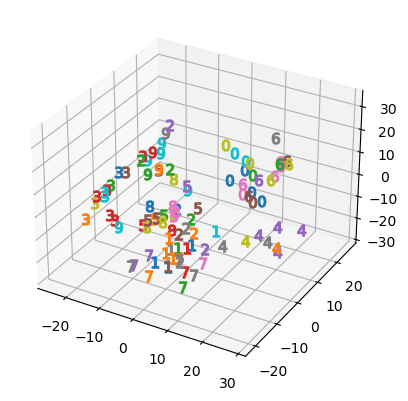

In [42]:
# plot using first three pricipal components as x,y,z values.
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
for i in range(100):
    ax.scatter(pca_images[i,0], pca_images[i,1], pca_images[i,2], marker=r'${}$'.format(labels[i]), s=64)

<b><h3>Whitening and ZCA</h3></b>

Due to the orthogonality constraint in the objective function, PCA transformation produces a nice side effect: the transformed features are no longer correlated. In other words, the inner products between pairs of feature vectors are zero. Using the orthogonality property of the singular vectors:

$Z^TZ$ = $\sum_kU_k^TU_k\sum_k$ = $\sum_k^2$

Then result is a diagonal matrix containing squares of the singular values representing the correlation of each feature vector with itself, also known as its $l^2$ norm. Sometimes, it is useful to also normalize the scale of the features to 1. In signal processing terms, this is known as whitening. It results in a set of features that have unit correlation with themselves and zero correlation with each other. Mathematically, whitening can be done by multiplying the PCA transformation with the inverse singular values.

$W_{white}$ = $V_k\sum_k^{-1}$

$Z_{white}$ = $XV_k\sum_k^{-1}$ = $U\sum{}V^TV_k\sum_k^{-1}$ = $U_k$

Whitening is independent from dimensionality reduction; one can perform one without the other. For example, zero-phase component analysis (ZCA) is a whitening transformation that is closely related to PCA, but does not reduce the number of features. ZCA whitening uses the full set of principal components $V$ without reduction, and includes an extra multiplication back onto $V^T$

$W_{ZCA}$ = $V\sum{}^{-1}V^T$


$Z_{zca}$ = $XV\sum^{-1}V^T$ = $U\sum{}V^TV\sum^{-1}$ = $U$

Simple PCA projection produces coordinates in the new feature space, where the principal components serve as the basis. These coordinates represent only the length of the projected vector, not the direction. Multiplication with the principal components gives us the length and the orientation. Another valid interpretation is that the extra multiplication rotates the coordinates back into the original feature space. ($V$ is an orthogonal matrix, and orthogonal matrices rotate their input without stretching or compression). So, ZCA produces whitened data that is as close (in Euclidean distance) to the original data as possible.

<b><h4>Considerations and Limitations of PCA</h4></b>

When using PCA for dimensionality reduction, one must address the question of how mnay principal components (k) to use. Like all hyperparameters, this number can be tuned based on the quality of the resulting model. But there are also heuristics that do not involve expensive computational methods.

One possibility is to pick k to account for a desired proportion of total variance. (This option is available in the scikit-lean package PCA.) The variance of the projection onto the kth componenet is:

$||Xv_k||^2$ = $||u_kσ_k||^2$  = $σ_k^2$

which is the square of the kth largest singular value of X. The ordered list of singular values of a matrix is called its spectrum. Thus, to determine how many componenets to use, one can perform a simple spectral analysis of the daa and pick the threshld that retains enough variance. To retain enough components to cover 80% of the total variance in the data, pick k such that

$\frac{\sum_{i=1}^kσ_i^2}{\sum_{i=1}^dσ_i^2} \geq 0.8$

Another method for picking k involves the intrinsic dimensionality of a dataset. Basically if the spectrum contains a few large singular values and a number of tiny ones, then one can probably just harvest the largest singular values and discard the rest.  This method requires visual inspection of the spectrum and hence cannot be performed as part of an automated pipeline.

PCA is fairly complex and the results are hard to interpret. The principal components and the projected vectors are real-valued and could be positive or negative. The principal components are essentially linear combinations of the (centered) rows, and the projection values are linear combinations of the columns. In a stock return application, for instance, each factor is a linear combination of time slices of stock returns.

PCA is computationally expensive. It relies on SVD which is an expensive procedure. To compute the full SVD of a matrix takes $O(nd^2 + d^2)$ operations, assuming $n\geq{d}$ ie there are more data points than features. Even if we only want k principal components, computing the truncated SVD (the k largest singular values and vectors) still takes $O(n+d)^2k$ = $O(n^2k)$ operations. This is prohibitive when there are a large number of data points or features.

It is difficult to perform PCA in a streaming fashion, in batch updates, or from a sample of the full data. Streaming computation of the SVD, updating the SVD, and computing the SVD from a subsample are all difficult research problems. Algorithms exist, but at a reduced accuracy. One implication is that one should expect lower representational accuracy when projecting test data onto principal components found in the training set. As the distribution of the data changes, one would have to recompute the principal components in the current dataset.

Lastly, it is bes not to apply PCA to raw counts (word counts, music play counts, movie viewing counts etc). The reason for this is that such counts often contain large outliers. PCA looks for linear correlations within the features. Correlation and variance statistics are very sensitive to large outliers; a single large number could change the statistics a lot. So it is a good idea to first trim the data of large values or apply a scaling transform like tf-idf or the log transform.

<b><h4>Use Cases</h4></b>

PCA transformation discards information from the data. Thus, the downstream model may be cheaper to train, but less accurate. One of the coolest applications of PCA is in anomaly detection of time series. For internet networks for example, the principal components of this matrix indicate the overall traffic trends on the network. The rest of the components represent the residual signal, which contains the anomalies. 

PCA is also often used in financial modeling. Financial quantities like stock returns are often correlated with each other. Stocks may move up and down at the same time or move in opposite directions. In order to balance volatility and reduce risk, an investment portfolio needs a diverse set of stocks that are not correlated with each other. Findiing strong correlation patterns is helpful for deciding on an investment strategy. In this use case, the end goal is the principal components themselves, not the transformed data.

ZCA is useful as a preprocessing step when learning from images. In natural images, adjacent pixels often have similar colors. ZCA whitening can remove this correlation, which allows subsequent modeling efforts to focus on more interesting image structures. Many deep learning models use PCA or ZCA as a preprocessing step, to speed up the convergence of the algorithm.

<b><h4>Summary</h4></b>

The mechanism of PCA is linear projection and the objective is to maximize the variance of the projected data. The solution involves the eigen decomposition of the covariance matrix, which is closely related to the SVD of the data matrix. PCA is an example of model-driven feature engineering (we maximize an objective function). The modeling assumption here is that variance adequately represents the information contained in the data. Equivalently, the model looks for linear correlations between features. This is used in several applications to reduce the correlation or find common factors in the input. PCA is a well-known dimensionality reduction method. But it has high computational cost and uninterpretable outcome. When seen as a method for eliminating linear correlation, PCA is related to ZCA, which whitens the data in an interpretable way, but does not reduce the dimensionality.